# XGBoost

In [2]:
import xgboost as xgb
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, RepeatedKFold, train_test_split
import matplotlib.pyplot as plt

%store -r dataset_modelo
%store -r X_train
%store -r X_val
%store -r Y_train
%store -r Y_val

In [3]:
# Separando regressoras da variável resposta 
X, y = dataset_modelo.iloc[:,:-1],dataset_modelo.iloc[:,-1]

#Utilizando formato interpretável para o modelo de XGBoost
data_dmatrix = xgb.DMatrix(data=X,label=y)


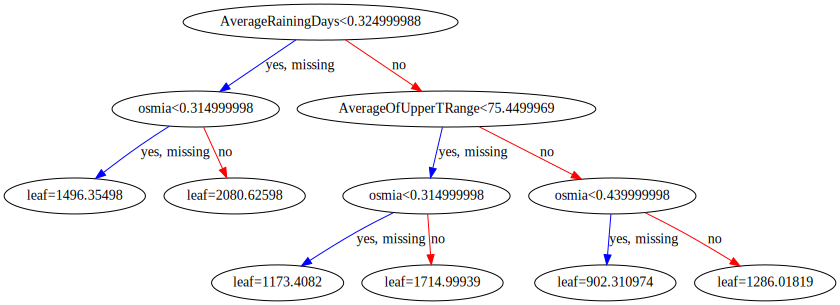

In [14]:
xg_reg = xgb.XGBRegressor(eval_metric=mean_absolute_error, n_estimators = 100, subsample = 0.9)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(xg_reg, X_train, Y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

xg_reg.fit(X_train, Y_train)
xgb.to_graphviz(xg_reg, num_trees=0)


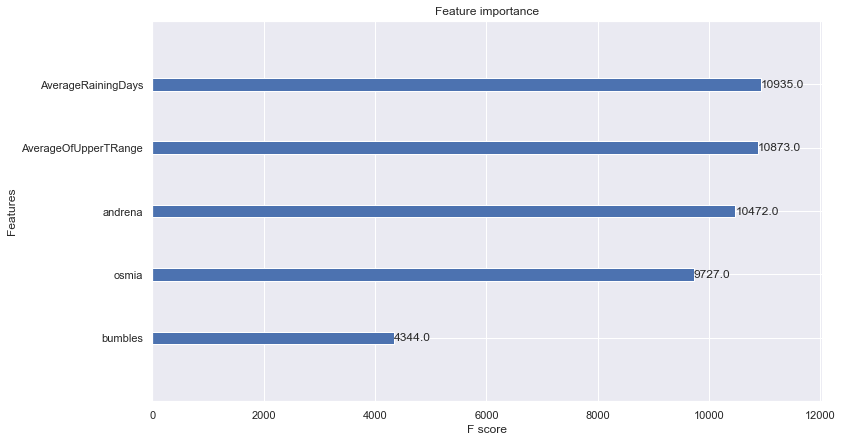

In [15]:

sns.set_theme()
sns.set(rc={"figure.figsize": [12, 7]})

#Importância de cada Feature
xgb.plot_importance(xg_reg);

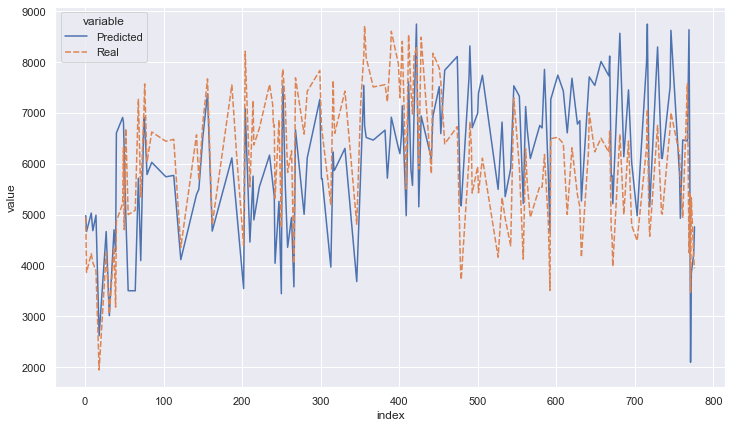

In [16]:
preds = xg_reg.predict(X_val)

finald = { "Predicted" : preds, "Real": Y_val}

plotdata = pd.DataFrame(finald)

df_melted = plotdata.reset_index().melt(id_vars='index')

sns.lineplot(data = df_melted, x = "index", y = "value", style = "variable", hue = "variable");

In [17]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

rmae = mean_absolute_error(y_pred = preds, y_true=Y_val)

print(rmae)


from sklearn.metrics import r2_score
r2_score(preds, Y_val)


1123.2646550848358


0.13156505189074152